In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim

In [ ]:
ip = np.expand_dims(np.arange(-1.2, 1.2, 0.005),1)
op = np.sinc(5*ip)

# Function 1

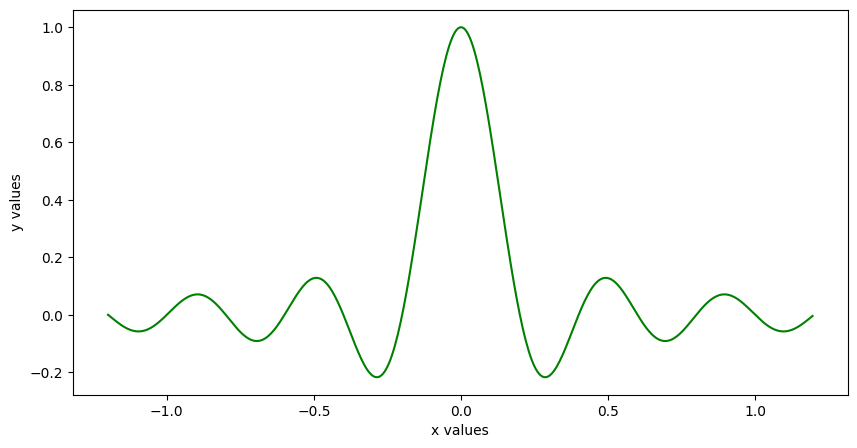

In [ ]:
import matplotlib.pyplot as plt

#Plot the function
x = torch.tensor(ip, dtype=torch.float32)
y = torch.tensor(op, dtype=torch.float32)

plt.figure(figsize=(10,5))
plt.xlabel('x values')
plt.ylabel('y values')
plt.plot(x, y, color = "green")
plt.show()

# Function 2

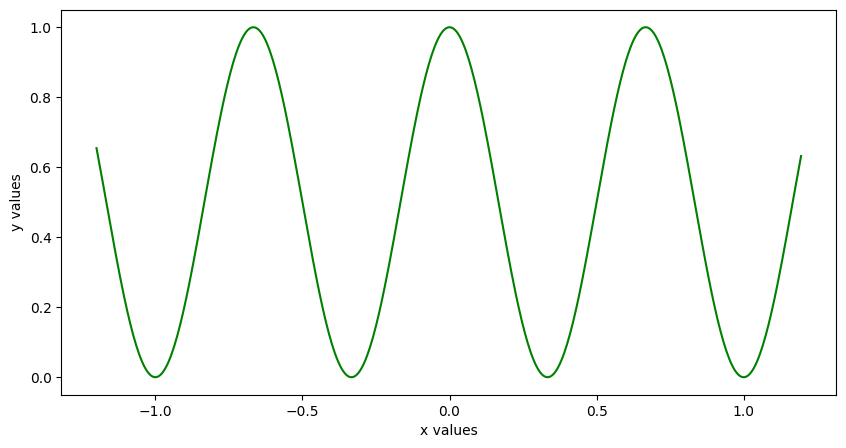

In [ ]:
x2=x
op2=(np.cos(3*np.pi*ip)/2 + 0.5)
y2 = torch.tensor(op2, dtype=torch.float32)

plt.figure(figsize=(10,5))
plt.xlabel('x values')
plt.ylabel('y values')
plt.plot(x2, y2, color='green')
plt.show()

In [ ]:
loss_func = torch.nn.MSELoss()
def calculate_params(model):
    return sum(p.numel() for p in model.parameters())

# Model 1 (7hidden layers and 1 output layer) -- 579 parameters

In [ ]:
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        self.l1 = nn.Linear(1, 4)
        self.l2 = nn.Linear(4, 8)
        self.l3 = nn.Linear(8, 12)
        self.l4 = nn.Linear(12, 10)
        self.l5 = nn.Linear(10, 10)
        self.l6 = nn.Linear(10, 10)
        self.l7 = nn.Linear(10, 6)
        self.l8 = nn.Linear(6, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.l1(x))
        x = nn.functional.leaky_relu(self.l2(x))
        x = nn.functional.leaky_relu(self.l3(x))
        x = nn.functional.leaky_relu(self.l4(x))
        x = nn.functional.leaky_relu(self.l5(x))
        x = nn.functional.leaky_relu(self.l6(x))
        x = nn.functional.leaky_relu(self.l7(x))

        x = self.l8(x)
        return x

print('Number of params in model 1 - ', calculate_params(Model_1()))

Number of params in model 1 -  579


# Funciton 2 (2 hidden layers and 1 output layer)-- 571 parameters

In [ ]:
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        self.l1 = nn.Linear(1, 80)
        self.l2 = nn.Linear(80, 5)
        self.l3 = nn.Linear(5, 1)

    def forward(self,x):
      x = nn.functional.leaky_relu(self.l1(x))
      x = nn.functional.leaky_relu(self.l2(x))

      x = self.l3(x)
      return x

print('Number of params in model 2 - ', calculate_params(Model_2()))

Number of params in model 2 -  571


# Funciton 3 (1 hidden layers and 1 output layer)-- 508 parameters

In [ ]:
class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()
        self.l1 = nn.Linear(1, 169)
        self.l2 = nn.Linear(169, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.l1(x))

        x = self.l2(x)
        return x

print('Number of params in model 3 - ', calculate_params(Model_3()))

Number of params in model 3 -  508


In [ ]:
def train(model, x, target):
    stop_condn=False
    epoch_values = []
    loss_values = []

    for epoch in range(30000):
        if(stop_condn):
            return epoch_values, loss_values, y_predicted

        #train model
        y_predicted = model(x)
        loss = loss_func(y_predicted, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_values.append(epoch)
        loss_values.append(loss.detach().numpy())


        if epoch % 300 == 0:
            print(f'Epoch - {epoch}, Loss = {loss.item():.4f}')

        # Check the model has reached convergence
        elif (loss_values[-1] < 0.001) and (epoch > 5) :
            if abs(loss_values[-3] - loss_values[-2]) < 1.0e-05 and abs(loss_values[-2] - loss_values[-1]) < 1.0e-05:
                print("Convergence reached for loss - ",loss_values[-1])
                stop_condn = True

    return epoch_values, loss_values, y_predicted

# Model 1 , Function 1

In [ ]:
# Train model for function 1 output
model_1 = Model_1()
optimizer = torch.optim.RMSprop(model_1.parameters(), lr = 0.001)
m1x_epoch_arr, m1x_loss_arr, m1y_prediction = train(model_1, x, y)

#m1x_epoch_arr: stores the information of each epoch
#m1x_loss_arr: stores the loss value corresponding to each epoch, usually used to draw the loss curve to observe whether the training process of the model converges.
#m1y_prediction: stores the prediction result of the model in the last epoch, which is used to compare the difference between the predicted value and the true value.

Epoch - 0, Loss = 0.0760
Epoch - 300, Loss = 0.0069
Epoch - 600, Loss = 0.0065
Epoch - 900, Loss = 0.0061
Epoch - 1200, Loss = 0.0045
Epoch - 1500, Loss = 0.0031
Epoch - 1800, Loss = 0.0030
Epoch - 2100, Loss = 0.0029
Epoch - 2400, Loss = 0.0027
Epoch - 2700, Loss = 0.0028
Epoch - 3000, Loss = 0.0026
Epoch - 3300, Loss = 0.0024
Epoch - 3600, Loss = 0.0024
Epoch - 3900, Loss = 0.0024
Epoch - 4200, Loss = 0.0024
Epoch - 4500, Loss = 0.0022
Epoch - 4800, Loss = 0.0023
Epoch - 5100, Loss = 0.0021
Epoch - 5400, Loss = 0.0020
Epoch - 5700, Loss = 0.0020
Epoch - 6000, Loss = 0.0018
Epoch - 6300, Loss = 0.0018
Epoch - 6600, Loss = 0.0016
Epoch - 6900, Loss = 0.0016
Epoch - 7200, Loss = 0.0016
Epoch - 7500, Loss = 0.0014
Epoch - 7800, Loss = 0.0014
Epoch - 8100, Loss = 0.0014
Epoch - 8400, Loss = 0.0012
Epoch - 8700, Loss = 0.0012
Epoch - 9000, Loss = 0.0014
Epoch - 9300, Loss = 0.0011
Convergence reached for loss -  0.0009838965


# Model 2, Function 1

In [ ]:
model_2 = Model_2()
optimizer = torch.optim.RMSprop(model_2.parameters(), lr = 0.001)
m2x_epoch_arr, m2x_loss_arr, m2y_prediction = train(model_2, x, y)

Epoch - 0, Loss = 0.3314
Epoch - 300, Loss = 0.0726
Epoch - 600, Loss = 0.0630
Epoch - 900, Loss = 0.0087
Epoch - 1200, Loss = 0.0056
Epoch - 1500, Loss = 0.0050
Epoch - 1800, Loss = 0.0045
Epoch - 2100, Loss = 0.0040
Epoch - 2400, Loss = 0.0038
Epoch - 2700, Loss = 0.0034
Epoch - 3000, Loss = 0.0033
Epoch - 3300, Loss = 0.0031
Epoch - 3600, Loss = 0.0030
Epoch - 3900, Loss = 0.0030
Epoch - 4200, Loss = 0.0029
Epoch - 4500, Loss = 0.0030
Epoch - 4800, Loss = 0.0028
Epoch - 5100, Loss = 0.0028
Epoch - 5400, Loss = 0.0030
Epoch - 5700, Loss = 0.0028
Epoch - 6000, Loss = 0.0028
Epoch - 6300, Loss = 0.0030
Epoch - 6600, Loss = 0.0029
Epoch - 6900, Loss = 0.0028
Epoch - 7200, Loss = 0.0028
Epoch - 7500, Loss = 0.0029
Epoch - 7800, Loss = 0.0027
Epoch - 8100, Loss = 0.0030
Epoch - 8400, Loss = 0.0026
Epoch - 8700, Loss = 0.0026
Epoch - 9000, Loss = 0.0027
Epoch - 9300, Loss = 0.0027
Epoch - 9600, Loss = 0.0027
Epoch - 9900, Loss = 0.0027
Epoch - 10200, Loss = 0.0027
Epoch - 10500, Loss = 0.0

# Model 3, Function 1

In [ ]:
model_3 = Model_3()
optimizer = torch.optim.RMSprop(model_3.parameters(), lr = 0.001)
m3x_epoch_arr, m3x_loss_arr, m3y_prediction = train(model_3, x, y)

Epoch - 0, Loss = 0.0905
Epoch - 300, Loss = 0.0342
Epoch - 600, Loss = 0.0255
Epoch - 900, Loss = 0.0193
Epoch - 1200, Loss = 0.0155
Epoch - 1500, Loss = 0.0129
Epoch - 1800, Loss = 0.0111
Epoch - 2100, Loss = 0.0099
Epoch - 2400, Loss = 0.0090
Epoch - 2700, Loss = 0.0083
Epoch - 3000, Loss = 0.0078
Epoch - 3300, Loss = 0.0074
Epoch - 3600, Loss = 0.0071
Epoch - 3900, Loss = 0.0068
Epoch - 4200, Loss = 0.0066
Epoch - 4500, Loss = 0.0064
Epoch - 4800, Loss = 0.0062
Epoch - 5100, Loss = 0.0061
Epoch - 5400, Loss = 0.0060
Epoch - 5700, Loss = 0.0058
Epoch - 6000, Loss = 0.0057
Epoch - 6300, Loss = 0.0056
Epoch - 6600, Loss = 0.0055
Epoch - 6900, Loss = 0.0054
Epoch - 7200, Loss = 0.0053
Epoch - 7500, Loss = 0.0052
Epoch - 7800, Loss = 0.0051
Epoch - 8100, Loss = 0.0051
Epoch - 8400, Loss = 0.0050
Epoch - 8700, Loss = 0.0049
Epoch - 9000, Loss = 0.0048
Epoch - 9300, Loss = 0.0047
Epoch - 9600, Loss = 0.0047
Epoch - 9900, Loss = 0.0046
Epoch - 10200, Loss = 0.0045
Epoch - 10500, Loss = 0.0

# Model 1, Function 2

In [ ]:
model_1 = Model_1()
optimizer = torch.optim.RMSprop(model_1.parameters(), lr = 0.001)
m1x2_epoch_arr, m1x2_loss_arr, m1y2_prediction = train(model_1, x2, y2)

Epoch - 0, Loss = 0.1276
Epoch - 300, Loss = 0.0580
Epoch - 600, Loss = 0.0474
Epoch - 900, Loss = 0.0394
Epoch - 1200, Loss = 0.0209
Epoch - 1500, Loss = 0.0105
Epoch - 1800, Loss = 0.0070
Epoch - 2100, Loss = 0.0064
Epoch - 2400, Loss = 0.0054
Epoch - 2700, Loss = 0.0050
Epoch - 3000, Loss = 0.0047
Epoch - 3300, Loss = 0.0052
Epoch - 3600, Loss = 0.0040
Epoch - 3900, Loss = 0.0040
Epoch - 4200, Loss = 0.0034
Epoch - 4500, Loss = 0.0035
Epoch - 4800, Loss = 0.0034
Epoch - 5100, Loss = 0.0034
Epoch - 5400, Loss = 0.0031
Epoch - 5700, Loss = 0.0031
Epoch - 6000, Loss = 0.0029
Epoch - 6300, Loss = 0.0027
Epoch - 6600, Loss = 0.0028
Epoch - 6900, Loss = 0.0026
Epoch - 7200, Loss = 0.0026
Epoch - 7500, Loss = 0.0029
Epoch - 7800, Loss = 0.0021
Epoch - 8100, Loss = 0.0031
Epoch - 8400, Loss = 0.0028
Epoch - 8700, Loss = 0.0017
Epoch - 9000, Loss = 0.0020
Epoch - 9300, Loss = 0.0024
Epoch - 9600, Loss = 0.0018
Convergence reached for loss -  0.00084673456


# Model 2, Funtion 2

In [ ]:
model_2 = Model_2()
optimizer = torch.optim.RMSprop(model_2.parameters(), lr = 0.001)
m2x2_epoch_arr, m2x2_loss_arr, m2y2_prediction = train(model_2, x2, y2)

Epoch - 0, Loss = 0.2159
Epoch - 300, Loss = 0.0669
Epoch - 600, Loss = 0.0314
Epoch - 900, Loss = 0.0139
Epoch - 1200, Loss = 0.0069
Epoch - 1500, Loss = 0.0043
Epoch - 1800, Loss = 0.0030
Epoch - 2100, Loss = 0.0023
Epoch - 2400, Loss = 0.0020
Epoch - 2700, Loss = 0.0016
Epoch - 3000, Loss = 0.0017
Epoch - 3300, Loss = 0.0015
Epoch - 3600, Loss = 0.0014
Epoch - 3900, Loss = 0.0013
Epoch - 4200, Loss = 0.0013
Epoch - 4500, Loss = 0.0013
Epoch - 4800, Loss = 0.0013
Epoch - 5100, Loss = 0.0012
Convergence reached for loss -  0.0009879831


# Model 3, Function 2

In [ ]:
model_3 = Model_3()
optimizer = torch.optim.RMSprop(model_3.parameters(), lr = 0.001)
m3x2_epoch_arr, m3x2_loss_arr, m3y2_prediction = train(model_3, x2, y2)

Epoch - 0, Loss = 1.0136
Epoch - 300, Loss = 0.0825
Epoch - 600, Loss = 0.0639
Epoch - 900, Loss = 0.0491
Epoch - 1200, Loss = 0.0378
Epoch - 1500, Loss = 0.0290
Epoch - 1800, Loss = 0.0219
Epoch - 2100, Loss = 0.0167
Epoch - 2400, Loss = 0.0128
Epoch - 2700, Loss = 0.0100
Epoch - 3000, Loss = 0.0079
Epoch - 3300, Loss = 0.0064
Epoch - 3600, Loss = 0.0053
Epoch - 3900, Loss = 0.0045
Epoch - 4200, Loss = 0.0040
Epoch - 4500, Loss = 0.0036
Epoch - 4800, Loss = 0.0033
Epoch - 5100, Loss = 0.0031
Epoch - 5400, Loss = 0.0029
Epoch - 5700, Loss = 0.0028
Epoch - 6000, Loss = 0.0027
Epoch - 6300, Loss = 0.0026
Epoch - 6600, Loss = 0.0025
Epoch - 6900, Loss = 0.0024
Epoch - 7200, Loss = 0.0023
Epoch - 7500, Loss = 0.0023
Epoch - 7800, Loss = 0.0023
Epoch - 8100, Loss = 0.0022
Epoch - 8400, Loss = 0.0021
Epoch - 8700, Loss = 0.0021
Epoch - 9000, Loss = 0.0020
Epoch - 9300, Loss = 0.0020
Epoch - 9600, Loss = 0.0020
Epoch - 9900, Loss = 0.0019
Epoch - 10200, Loss = 0.0019
Epoch - 10500, Loss = 0.0

# Compare the prediction result of three different modles for function 1

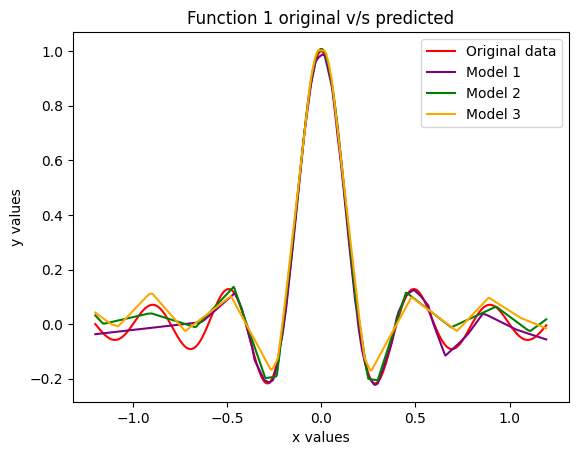

In [ ]:
plt.title("Function 1 original v/s predicted")
plt.plot(x, y, color='red')
plt.plot(x, m1y_prediction.data, 'purple')
plt.plot(x, m2y_prediction.data, 'green')
plt.plot(x, m3y_prediction.data, 'orange')
plt.legend(['Original data', 'Model 1', 'Model 2','Model 3'])
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

# Loss

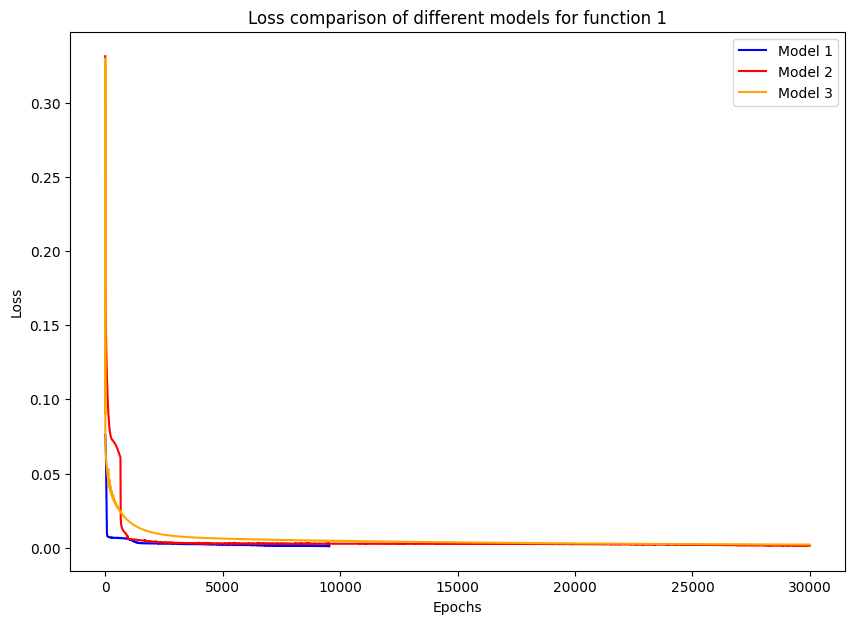

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Loss comparison of different models for function 1")
plt.plot(m1x_epoch_arr, m1x_loss_arr, 'b')
plt.plot(m2x_epoch_arr, m2x_loss_arr, 'red')
plt.plot(m3x_epoch_arr, m3x_loss_arr, 'orange')
plt.legend([ 'Model 1', 'Model 2','Model 3'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Compare the prediction result of three different modles for function 2

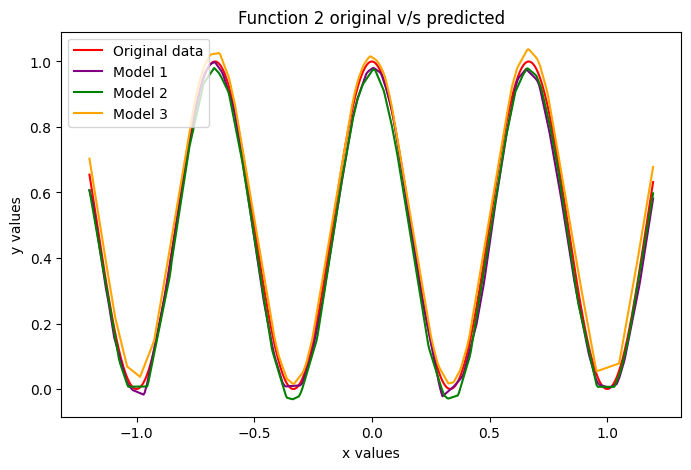

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Function 2 original v/s predicted")
plt.plot(x2, y2, color='red')
plt.plot(x, m1y2_prediction.data, 'purple')
plt.plot(x, m2y2_prediction.data, 'green')
plt.plot(x, m3y2_prediction.data, 'orange')
plt.legend(['Original data','Model 1', 'Model 2','Model 3'])
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

# Loss

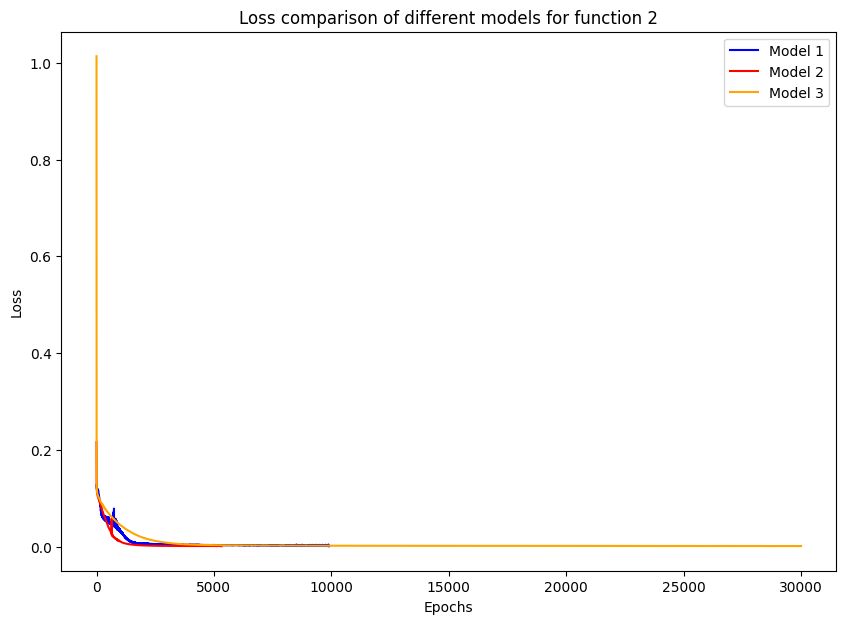

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Loss comparison of different models for function 2")
plt.plot(m1x2_epoch_arr, m1x2_loss_arr, 'b')
plt.plot(m2x2_epoch_arr, m2x2_loss_arr, 'red')
plt.plot(m3x2_epoch_arr, m3x2_loss_arr, 'orange')
plt.legend([ 'Model 1', 'Model 2','Model 3'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()